In [1]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Model
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import pickle

In [19]:
df = pd.read_csv('dataset/training-svm.csv')
df = df.iloc[:, 1:]
df['Status Orang Tua'] = df['Status Orang Tua'].replace({'0,5' : 0.5, '0,75' : 0.75})
df['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].replace({'0,5' : 0.5, '0,75' : 0.75})
df['Data Dinas Sosial'] = df['Data Dinas Sosial'].replace({'0,5' : 0.5, '0,75' : 0.75})

df['Status Orang Tua'] = df['Status Orang Tua'].astype(float)
df['Penghasilan Orang Tua'] = df['Penghasilan Orang Tua'].astype(float)
df['Data Dinas Sosial'] = df['Data Dinas Sosial'].astype(float)

df

,KIP,Status Orang Tua,Penghasilan Orang Tua,Data Dinas Sosial,Target
0,4,0.50,1.00,1.00,1
1,0,1.00,0.00,0.50,0
2,4,1.00,0.75,1.00,1
3,0,1.00,0.00,0.50,0
4,4,0.50,0.75,1.00,1
...,...,...,...,...,...
145,4,0.75,0.50,0.75,1
146,0,0.75,0.00,0.50,0
147,4,1.00,1.00,1.00,1
148,0,0.50,0.00,0.50,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   KIP                    150 non-null    int64  
 1   Status Orang Tua       150 non-null    float64
 2   Penghasilan Orang Tua  150 non-null    float64
 3   Data Dinas Sosial      150 non-null    float64
 4   Target                 150 non-null    int64  
dtypes: float64(3), int64(2)
memory usage: 6.0 KB


In [21]:
df.isnull().sum()

KIP                      0
Status Orang Tua         0
Penghasilan Orang Tua    0
Data Dinas Sosial        0
Target                   0
dtype: int64

# Visualisasi

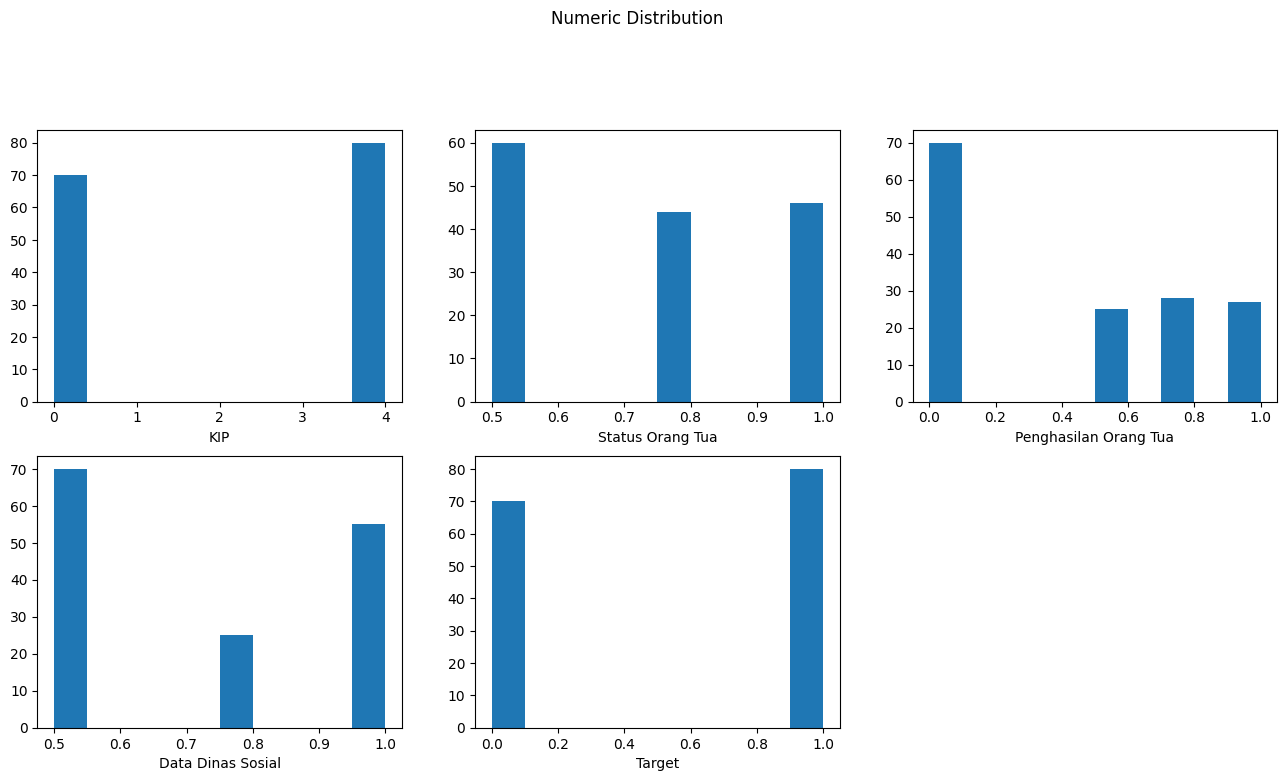

In [22]:
numeric_data = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(16,12))
idx = 1
for i in numeric_data:
    plt.subplot(3,3,idx)
    plt.hist(df[i])
    idx += 1
    plt.xlabel(i)
plt.suptitle("Numeric Distribution")
plt.show()

# Model SVM

In [23]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Grid Search Tunning

In [24]:
model = SVC()
parameters = {
    'C': [0.1, 1, 10, 1000], 
    'gamma':[1, 0.1, 0.01, 0.001],
    'kernel': ['poly', 'rbf', 'sigmoid']
    }
grid = GridSearchCV(model, parameters)
grid.fit(X_train, y_train)
print("Parameter Terbaik : {}".format(grid.best_params_))

Parameter Terbaik : {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}


# Training

In [25]:
new_model = SVC(C= 0.1, gamma= 1, kernel='poly')
new_model.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly')

In [26]:
accuracy = new_model.score(X_test, y_test)
print("Accuracy : {:,.1f} %".format(int(accuracy * 100)))

Accuracy : 100.0 %


In [27]:
pickle.dump(new_model, open('model_beasiswa_svm.pkl', 'wb'))

In [31]:
loaded_model = pickle.load(open('model_beasiswa_svm.pkl', 'rb'))

# Testing

In [49]:
list_predict = []
for i in range(len(df)):
    data = df.iloc[i, :-1].values
    predict = loaded_model.predict([data])
    if predict == 1:
        list_predict.append(1)
    else:
        list_predict.append(0)


In [51]:
df['prediksi_svm'] = list_predict
df

,KIP,Status Orang Tua,Penghasilan Orang Tua,Data Dinas Sosial,Target,prediksi_svm
0,4,0.50,1.00,1.00,1,1
1,0,1.00,0.00,0.50,0,0
2,4,1.00,0.75,1.00,1,1
3,0,1.00,0.00,0.50,0,0
4,4,0.50,0.75,1.00,1,1
...,...,...,...,...,...,...
145,4,0.75,0.50,0.75,1,1
146,0,0.75,0.00,0.50,0,0
147,4,1.00,1.00,1.00,1,1
148,0,0.50,0.00,0.50,0,0


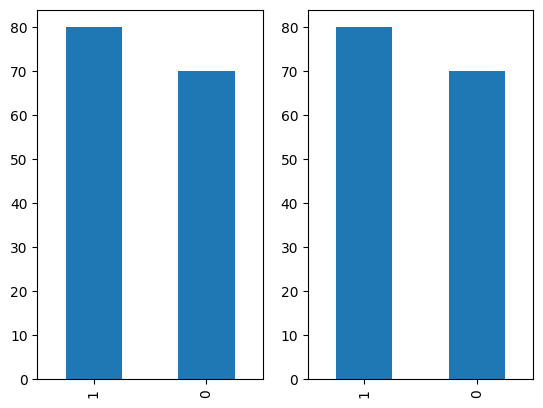

In [56]:

plt.subplot(1, 2, 1)
df['Target'].value_counts().plot(kind='bar')

plt.subplot(1, 2, 2)
df['prediksi_svm'].value_counts().plot(kind='bar')

plt.show()